# The Cost of an Undergraduate Education (2019 / 2021)
### A look at costs per state, per type, and per length

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import os
import matplotlib.cm as cm

warnings.filterwarnings("ignore")

**Import csv file and display initial dataframe**

In [2]:
school_df = pd.read_csv("data_sources/nces330_20.csv")
school_df = school_df.dropna()
school_df = school_df.rename(columns={"Value": "Cost"})
school_df.head()

,Year,State,Type,Length,Expense,Cost
0,2013,Alabama,Private,4-year,Fees/Tuition,13983
1,2013,Alabama,Private,4-year,Room/Board,8503
2,2013,Alabama,Public In-State,2-year,Fees/Tuition,4048
3,2013,Alabama,Public In-State,4-year,Fees/Tuition,8073
4,2013,Alabama,Public In-State,4-year,Room/Board,8473


In [3]:
school_df["State"].value_counts()

Alabama                 71
Montana                 71
New Hampshire           71
New Jersey              71
New Mexico              71
New York                71
North Carolina          71
North Dakota            71
Ohio                    71
Oklahoma                71
Oregon                  71
Pennsylvania            71
Rhode Island            71
South Carolina          71
South Dakota            71
Tennessee               71
Texas                   71
Utah                    71
Vermont                 71
Virginia                71
Washington              71
West Virginia           71
Wisconsin               71
Nebraska                71
Missouri                71
Illinois                71
California              71
Connecticut             71
Arkansas                71
Arizona                 71
Florida                 71
Georgia                 71
Hawaii                  71
Idaho                   71
Mississippi             71
Indiana                 71
Iowa                    71
K

In [4]:
# Get dataset info
school_df.info()
# Display the description of the dataframe
school_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     3548 non-null   int64 
 1   State    3548 non-null   object
 2   Type     3548 non-null   object
 3   Length   3548 non-null   object
 4   Expense  3548 non-null   object
 5   Cost     3548 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 166.4+ KB


,Year,Cost
count,3548.000000,3548.000000
mean,2016.923337,13027.720124
std,2.553910,8734.568645
min,2013.000000,1225.000000
25%,2015.000000,7756.750000
50%,2017.000000,10203.500000
75%,2019.000000,14830.750000
max,2021.000000,49152.000000


In [5]:
# Get the dimension of the dataframe
school_df.shape
# Check for the missing values in the dataset
school_df.isna().sum()


Year       0
State      0
Type       0
Length     0
Expense    0
Cost       0
dtype: int64

In [6]:
state_codes = {"Alabama": "AL", "Montana": "MT", "New Hampshire": "NH", "New Jersey": "NJ",
               "New Mexico": "NM", "New York": "NY", "North Carolina": "NC", "North Dakota": "ND",
               "Ohio": "OH", "Oklahoma": "OK", "Oregon": "OR", "Pennsylvania": "PA", 
               "Rhode Island": "RI", "South Carolina": "SC", "South Dakota": "SD", "Tennessee": "TN",
               "Texas": "TX", "Utah": "UT", "Vermont": "VT", "Virginia": "VA", 
               "Washington": "WA", "West Virginia": "WV", "Wisconsin": "WI", "Nebraska": "NE",
               "Missouri": "MO", "Illinois": "IL", "California": "CA", "Connecticut": "CT",
               "Arkansas": "AR", "Arizona": "AZ", "Florida": "FL", "Georgia": "GA",
               "Hawaii": "HI", "Idaho": "ID", "Mississippi": "MS", "Indiana": "IN",
               "Iowa": "IA", "Kansas": "KS", "Kentucky": "KY", "Louisiana": "LA",
               "Maine": "ME", "Maryland": "MD", "Massachusetts": "MA", "Michigan": "MI",
               "Minnesota": "MN", "Colorado": "CO", "Nevada": "NV", "Alaska": "AK",
               "Delaware": "DE", "Wyoming": "WY", "District of Columbia": "DC"}

school_df["State Code"] = school_df["State"].map(state_codes)

**Create seperate dataframes for fees/tuition and room/board. Create frames for 3 year period**

In [7]:
fees_tuition_data = school_df[school_df["Expense"].str.lower().str.contains("fees/tuition")]
fees_tuition_data["Expense"] = fees_tuition_data["Expense"].str.replace("Room/Board", "")
fees_tuition_data.reset_index(drop = True, inplace = True)

room_board_data = school_df[school_df["Expense"].str.lower().str.contains("room/board")]
room_board_data["Expense"] = room_board_data["Expense"].str.replace("Fees/Tuition", "")
room_board_data.reset_index(drop = True, inplace = True)

fees_tuition_data_2019 = fees_tuition_data[fees_tuition_data["Year"] == 2019]

**Further separate frames into private and public institutions, three years**

In [8]:
school_private_2021 = fees_tuition_data[fees_tuition_data["Type"] == "Private"].groupby(["State"]).max()
school_private_2021 = school_private_2021.sort_values(by="Cost")
school_private_2021 = school_private_2021[school_private_2021["Year"] == 2021]
del school_private_2021["Year"]

school_public_2021 = fees_tuition_data[fees_tuition_data["Type"] != "Private"].groupby(["State"]).max()
school_public_2021 = school_public_2021.sort_values(by="Cost")
school_public_2021 = school_public_2021[school_public_2021["Year"] == 2021]
del school_public_2021["Year"]

In [9]:
school_private_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] == "Private"].groupby(["State"]).max()
school_private_2019 = school_private_2019.sort_values(by="Cost")

school_public_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Type"] != "Private"].groupby(["State"]).max()
school_public_2019 = school_public_2019.sort_values(by="Cost")

**Finally, grab the differences between two and four year costs, 2021 and 2019**

In [10]:
school_twoyear = fees_tuition_data[fees_tuition_data["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear = school_twoyear.sort_values(by="Cost")
school_twoyear = school_twoyear[school_twoyear["Year"] == 2021]
del school_twoyear["Year"]

school_twoyear_2019 = fees_tuition_data_2019[fees_tuition_data_2019["Length"] == "2-year"].groupby(["State"]).max()
school_twoyear_2019 = school_twoyear_2019.sort_values(by="Cost")
del school_twoyear_2019["Year"]

school_fouryear_public_2021 = school_public_2021[school_public_2021["Length"] == "4-year"]
school_fouryear_public_2021.head()

school_fouryear_public_2019 = school_public_2019[school_public_2019["Length"] == "4-year"]
del school_fouryear_public_2019["Year"]

In [11]:
### Nema added 4/8
# Compute yearly expenses /cost
#school_df = school_df.rename(columns={"Expense": "Expense Type"})
avg_yearly_cost = school_df.groupby(['Year','Expense']).mean().round(2).reset_index() 
avg_yearly_cost


,Year,Expense,Cost
0,2013,Fees/Tuition,12630.67
1,2013,Room/Board,9278.98
2,2014,Fees/Tuition,13087.60
3,2014,Room/Board,9578.55
4,2015,Fees/Tuition,13481.23
5,2015,Room/Board,9822.45
6,2016,Fees/Tuition,13991.57
7,2016,Room/Board,10107.83
8,2017,Fees/Tuition,14512.60
9,2017,Room/Board,10415.84


In [12]:
### Nema added 4/8
# Separate expenses / cost (Fees/Tuition) & Room/Board
yearly_cost_fees_tuition = avg_yearly_cost['Cost'] == 'Fees/Tuition'
yearly_cost_Room_Board = avg_yearly_cost['Cost'] == 'Room_Board'
yearly_fees_tuition = avg_yearly_cost[yearly_cost_fees_tuition].groupby('Year')['Cost'].mean().round(2) 
yearly_Room_Board = avg_yearly_cost[yearly_cost_Room_Board].groupby('Year')['Cost'].mean().round(2) 


In [13]:
### Nema added 4/8
# Get the median cost 
median_cost = school_df['Cost'].median()
median_cost

10203.5

In [14]:

### Nema added 4/8
# Get the average cost all state
avg_cost_state = school_df.groupby('State')['Cost'].mean().sort_values()
avg_cost_state

State
Idaho                    8609.197183
Wyoming                  8725.293103
Utah                     8918.549296
North Dakota             9227.746479
South Dakota             9647.070423
Mississippi              9657.126761
West Virginia           10080.295775
New Mexico              10114.549296
Arkansas                10233.816901
Kansas                  10589.464789
Nebraska                10701.816901
Missouri                11174.746479
Arizona                 11195.957746
Oklahoma                11215.225352
Florida                 11356.098592
Alabama                 11362.732394
Alaska                  11629.174603
Montana                 11658.943662
Iowa                    12403.718310
Wisconsin               12499.394366
Hawaii                  12524.309859
Georgia                 12563.000000
Texas                   12596.380282
Minnesota               12642.295775
Nevada                  12710.600000
North Carolina          12843.859155
Kentucky                12941.28

## Plot out costs gathered from created DataFrames and compare them to eachother

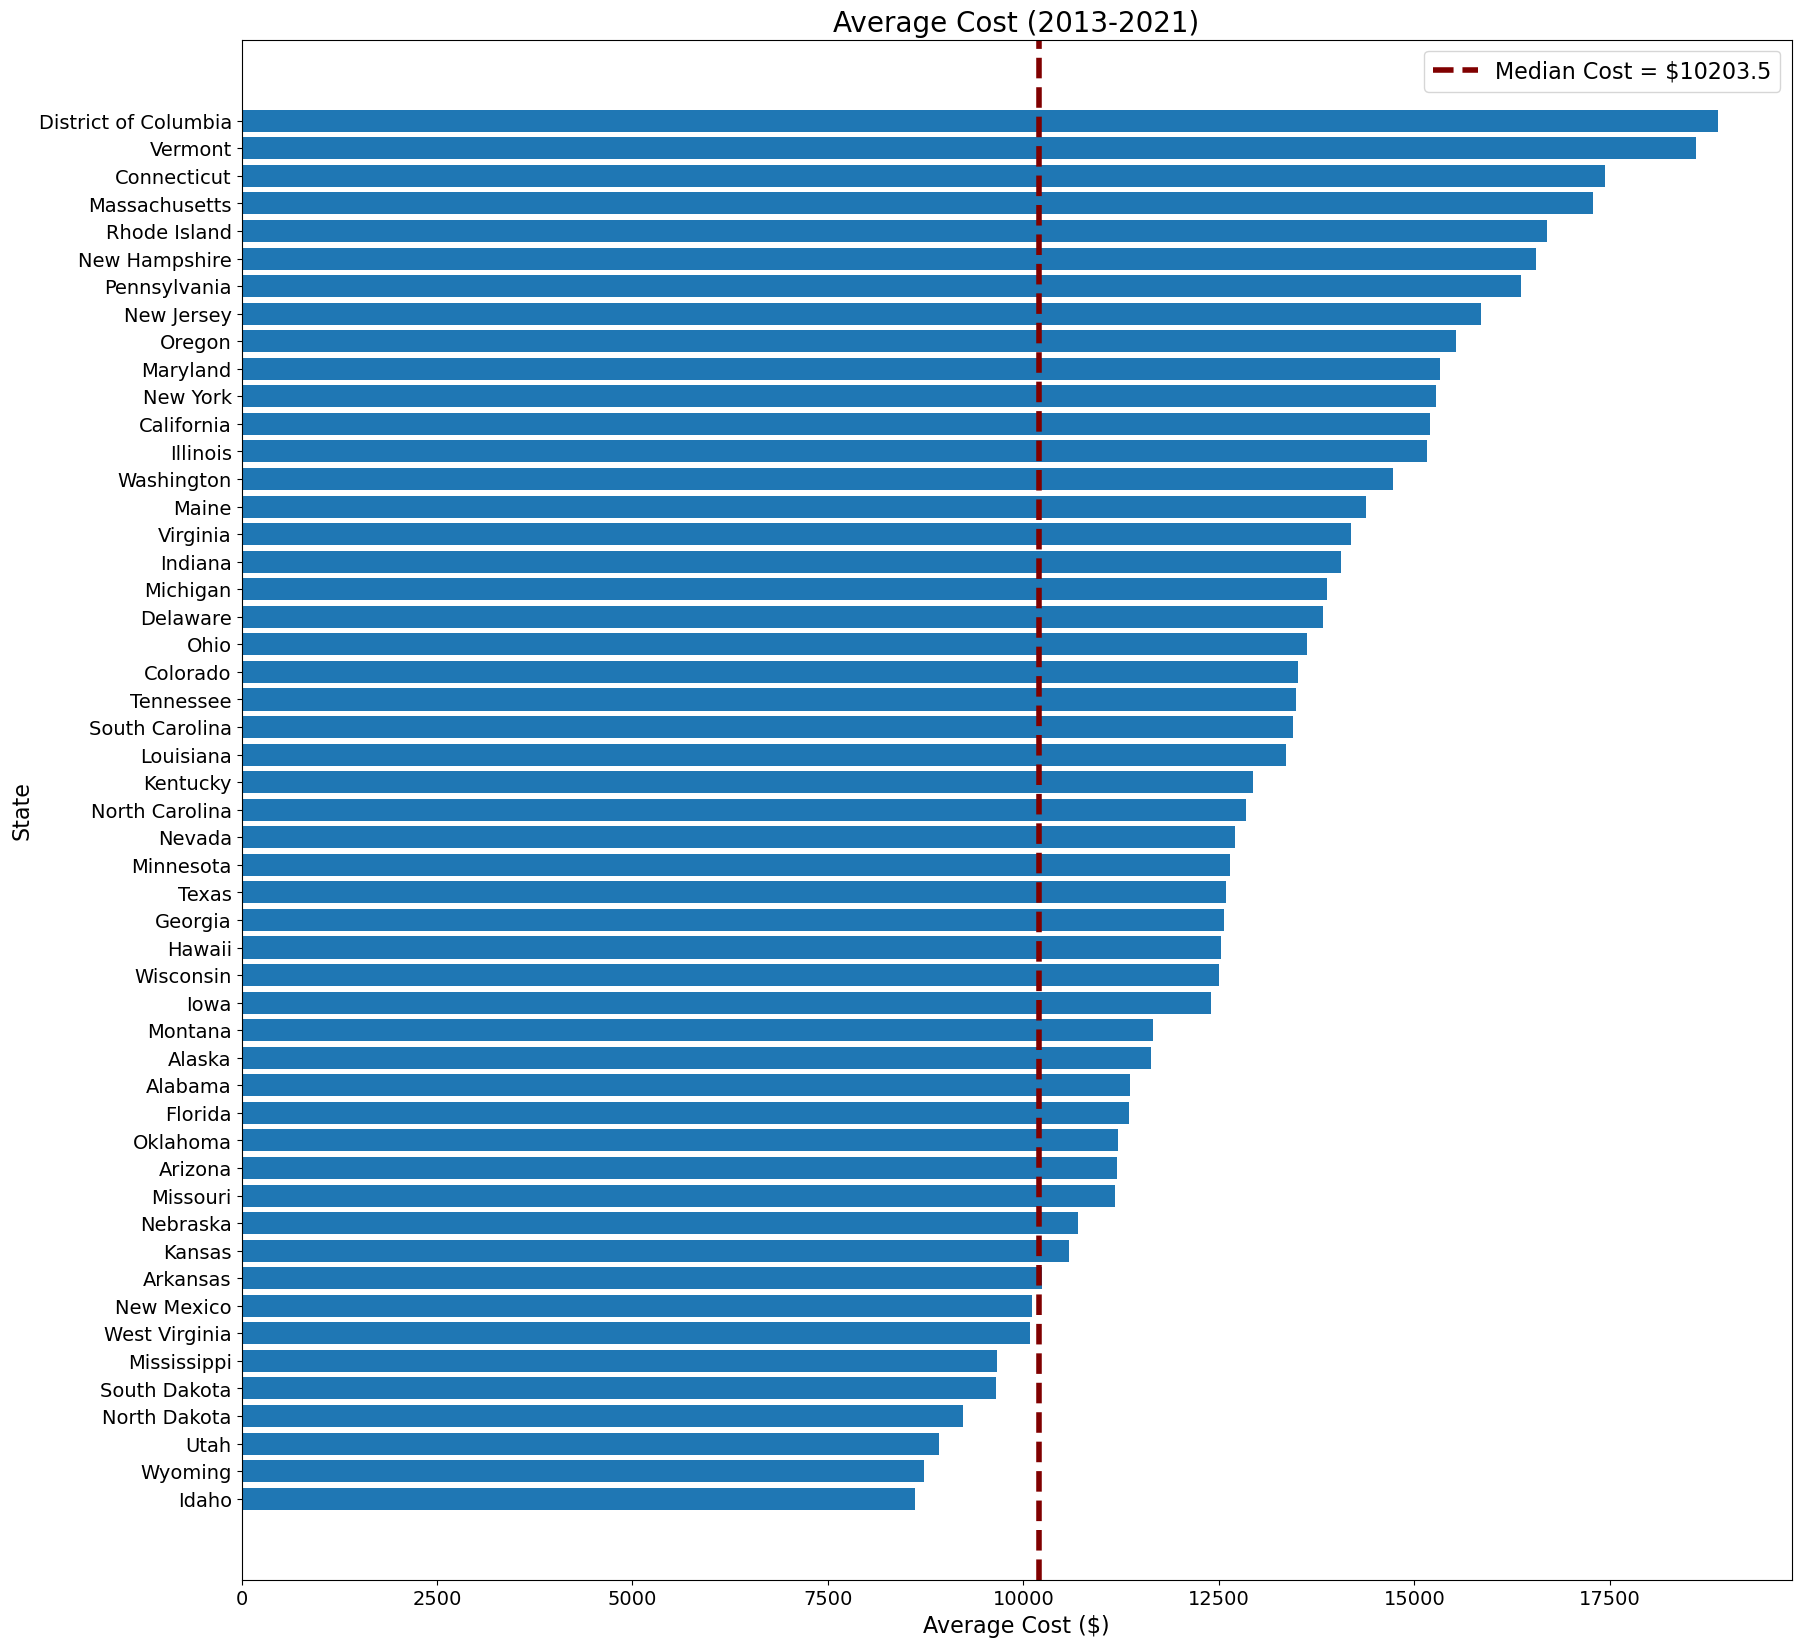

In [15]:
### Nema added 4/8
# Plot the average cost of all states and add a vertical line (median)
plt.figure(figsize=(20,20))
plt.barh(avg_cost_state.index, avg_cost_state.values, color="#1f77b4")
plt.title("Average Cost (2013-2021)", fontsize = 20)
plt.xlabel("Average Cost ($)", fontsize = 16)
plt.ylabel("State", fontsize = 16)
plt.axvline(median_cost, color= "maroon", ls ="--", label = f'Median Cost = ${median_cost}',lw= 4)
plt.legend(fontsize = 16, loc ="upper right")
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.show()

# Analysis: The median (cost) is $10,203.5. Most states are above the median. Idaho, Wyoming, Utah, North Dakota, South Dakota, Mississippi, West Virginia, & New Mexico were the states below the median.

_
### Plot 2019 and 2021 cost of 4 year public and private education
_

In [16]:
school_fouryear_public_2019[:5].plot.barh(figsize=(8, 5), color="brown")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education",
          fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()


In [ ]:
school_fouryear_public_2019[46:].plot.barh(figsize=(8, 5), color="brown")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education",
          fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()


In [ ]:
school_fouryear_public_2019.plot.bar(figsize = (15  ,5), color="brown")
plt.legend(labels=["4 Year Cost"])
plt.title("2019 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2019.png"))
plt.show()

In [ ]:
school_fouryear_public_2021.plot.bar(figsize = (18,5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("2021 Average Fees/Tuition Cost of a 4 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()

In [ ]:
combined_for_plot_2021 = pd.merge(school_fouryear_public_2019, school_fouryear_public_2021, on=[
                                  "State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2021 = combined_for_plot_2021.rename(columns={"Cost_x": "Cost 2019",
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2021["Tuition_Diff_2021-2019"] = combined_for_plot_2021["Cost 2021"] - \
    combined_for_plot_2021["Cost 2019"]
combined_for_plot_2021["% Tuition Increase 2019-2021"] = (
    combined_for_plot_2021["Tuition_Diff_2021-2019"] / combined_for_plot_2021["Cost 2019"])*100
combined_for_plot_2021




##  "Percentage Variance from 2019 to 2021 Public out of state 4 years"

In [ ]:
combined_for_plot_2021["% Tuition Increase 2019-2021"].plot.bar(figsize=(18, 5), color="blue")
plt.legend(labels=["4 Year Cost"])
plt.title("Percenatage Variance from 2019 to 2021 Public out of state 4 years",
          fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Percentage", fontweight="bold")
#plt.text(combined_for_plot_2021["% Tuition Increase 2019-2021"])

# plt.savefig(os.path.join("output", "public_2021.png"))
plt.show()


In [ ]:
combined_for_plot_2021 = pd.merge(school_fouryear_public_2019, school_fouryear_public_2021, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2021 = combined_for_plot_2021.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2021.head()

In [ ]:
combined_for_plot_2021.plot.bar(figsize = (18, 5), color=["brown", "blue"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 4 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "four_comparison_2019_2021.png"))
plt.show()

In [ ]:
school_twoyear_2019.plot.bar(figsize = (18,5), color="black")
plt.legend(labels=["2019 2 Year Cost"])
plt.title("2019 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2019.png"))
plt.show()

In [ ]:
school_twoyear.plot.bar(figsize = (18,5), color="red")
plt.legend(labels=["2 Year Cost"])
plt.title("2021 Average Fees/Tuition of a 2 Year Public Education", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "two_year_public_2021.png"))
plt.show()

**Combine 2year dataframes to make comparison chart**

In [ ]:
combined_for_plot_2year = pd.merge(school_twoyear_2019, school_twoyear, on=["State", "State Code", "Length", "Expense", "Type"])
combined_for_plot_2year = combined_for_plot_2year.rename(columns={"Cost_x": "Cost 2019", 
                                                                "Cost_y": "Cost 2021",
                                                                })
combined_for_plot_2year.head()

In [ ]:
combined_for_plot_2year.plot.bar(figsize = (18, 5), color=["black", "red"], width = 0.6)
plt.title("2019/2021 State Cost Comparison 2 year public education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_comparison_2019_2021.png"))
plt.show()

_
### Plots to compare 2021 plot data to eachother to see differences in education cost per state
_

In [ ]:
combined_for_plot = pd.merge(school_fouryear_public_2021, school_twoyear, on="State")
combined_for_plot = combined_for_plot.rename(columns={"Cost_x": "4 Year Cost", "Cost_y": "2 Year Cost"})

In [ ]:
combined_for_plot.plot.bar(figsize = (18, 5), color=["blue", "red"], width = 0.6)
plt.title("2021 State Cost Comparison of a 2 and 4 Year Public Education", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "two_four_comparison.png"))
plt.show()

In [ ]:
school_private_2021.plot.bar(figsize = (18, 5), color = "orange")
plt.legend(labels=["Private Cost"])
plt.title("2021 Average Fees/Tuition Cost of a Private Education", fontweight = "bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
plt.savefig(os.path.join("output", "private.png"))
plt.show()

In [ ]:
df_combined = pd.concat([school_private_2021, school_fouryear_public_2021], axis=1)
df_combined = df_combined.dropna()
df_combined.plot.bar(figsize = (18, 5), color = ["orange", "blue"])
plt.legend(labels=["Private Cost", "Public Cost"])
plt.title("2021 State Cost Comparison of a Private and Public Education", fontweight = "bold")
plt.xlabel("State", fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.savefig(os.path.join("output", "private_public_comparison.png"))
plt.show()

### Add Heatmaps showing a nice visual for where most expensive states are

In [ ]:
fig = px.choropleth(school_fouryear_public_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale = "PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Public 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()

In [ ]:
fig = px.choropleth(school_private_2021,
                    locations = "State Code",
                    locationmode = "USA-states",
                    scope = "usa",
                    color = "Cost",
                    color_continuous_scale="PuBu",
                    template = "seaborn",
                    title = "2021 Map of Fees/Tuition per state (Private 4-Year)",
                    width = 800,
                    height = 600,
                    labels = {"Cost": "Cost ($)"}
    )
fig.show()

In [ ]:
### NA suggest tov work on visualization of > the average cost of undergraduate / type

type_avg_cost = school_df.groupby('Type').mean(numeric_only=True)


In [ ]:
### NA Create the pie plot
# Plot the pie chart
explode = (0.05, .0, .0)
plt.pie(type_avg_cost['Cost'], labels=type_avg_cost.index,
        autopct='%1.1f%%', shadow=True, startangle=90, explode=explode)
plt.axis('equal')
plt.title('Undergraduate average cost per type', fontsize=14)
plt.show()


In [ ]:
avg_year_cost = school_df.groupby('Year').mean(numeric_only=True)
plt.figure(figsize=(8, 5))
plt.plot(avg_year_cost.index, avg_year_cost['Cost'], marker="s", color="blue")
plt.legend(['State'], loc='upper left', fontsize=10)
plt.xlabel('State', fontweight="bold")
plt.ylabel('Cost ($)', fontweight="bold")
plt.title('Average Cost by year', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()
# avg_year_cost


In [ ]:
avg_year_cost = school_df.groupby('Year').sum(numeric_only=True)
plt.figure(figsize=(8, 5))
plt.plot(avg_year_cost.index, avg_year_cost['Cost'], marker="s", color="blue")
plt.legend(['State'], loc='upper left', fontsize=10)
plt.xlabel('State', fontweight="bold")
plt.ylabel('Cost ($)', fontweight="bold")
plt.title('Total Cost by year', fontsize=14)
plt.xticks(rotation=90)
plt.grid()
plt.show()
# avg_year_cost


In [ ]:
group_year_cost = school_df.groupby(["Year"]).sum()
colors = ["blue"]
group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                     fontsize=9, edgecolor='blue',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year for All Schools", fontsize=14)
plt.tight_layout()
plt.show()
# print(group_year_cost)


In [ ]:
# type_cost_year = school_df.groupby(["State","Year","Type"])
type_private = school_df[(school_df["Type"] == "Private")]
private_group_year_cost = type_private.groupby(["Year"]).sum()
colors = ["blue"]
private_group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                             fontsize=9, edgecolor='blue',  align="center")
plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Private Schools", fontsize=14)
# plt.tight_layout()
plt.show()
# private_group_year_cost


In [ ]:
type_in_state = school_df[(school_df["Type"] == "Public In-State")]
type_in_state_group = type_in_state.groupby(["Year"]).sum()
colors = ["blue"]
type_in_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                         fontsize=9, edgecolor='blue',  align="center")
plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - In State", fontsize=14)
# plt.tight_layout()
plt.show()
# type_in_state_group


In [ ]:
type_out_state = school_df[(school_df["Type"] == "Public Out-of-State")]
type_out_state_group = type_out_state.groupby(["Year"]).sum()
colors = ["blue"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='blue',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Out of State", fontsize=14)
# plt.tight_layout()
plt.show()
# type_out_state_group


In [ ]:
school_df

In [ ]:
group_year_cost = fees_tuition_data.groupby(["Year"]).sum()
colors = ["orange","yellow"]
group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                     fontsize=9, edgecolor='orange',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition by Year for All Schools", fontsize=14)
plt.tight_layout()
plt.show()
# print(group_year_cost)


In [ ]:

type_in_state = fees_tuition_data[(
    fees_tuition_data["Type"] == "Public In-State")]
type_out_state_group = type_in_state.groupby(["Year"]).sum()
colors = ["orange"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='orange',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition by Year - In-State", fontsize=14)
# plt.tight_layout()
plt.show()
type_out_state_group


In [ ]:
type_out_state = fees_tuition_data[(
    fees_tuition_data["Type"] == "Public Out-of-State")]
type_out_state_group = type_out_state.groupby(["Year"]).sum()
colors = ["orange"]
type_out_state_group.plot(kind="bar", figsize=(8, 5), color=colors,
                          fontsize=9, edgecolor='orange',  align="center")
# plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Tuition Cost by Year - Out of State", fontsize=14)
# plt.tight_layout()
plt.show()
type_out_state_group


In [ ]:
# type_cost_year = school_df.groupby(["State","Year","Type"])
type_private = fees_tuition_data[(fees_tuition_data["Type"] == "Private")]
private_group_year_cost = type_private.groupby(["Year"]).sum()

colors = ("orange")
private_group_year_cost.plot(kind="bar", figsize=(8, 5), color=colors,
                             fontsize=9, edgecolor='orange',  align="center")
plt.rcParams["figure.facecolor"]
# plt.label("Cost")
plt.legend(['Yearly Cost'], loc='upper left', fontsize=10)
plt.xlabel("Year", fontweight="bold")
plt.ylabel("Cost (in Millions)", fontweight="bold")
plt.title("Total Cost by Year - Private Schools", fontsize=14)
# plt.tight_layout()
plt.show()
private_group_year_cost


In [ ]:

plt.scatter(fees_tuition_data["State Code"], fees_tuition_data["Cost"], 
            marker="o", facecolors="red", edgecolors="black")
plt.xticks(rotation="vertical")
plt.title("Cost Grouping by State",
          fontweight="bold")
plt.ylabel("Cost ($)", fontweight="bold")
plt.xlabel("State", fontweight="bold")
# plt.figure(figsize=(20, 4))
plt.show()



In [ ]:
plt.hist(fees_tuition_data["Cost"])
 
plt.title("Number of Schools / Cost",
          fontweight="bold")
plt.ylabel("School Count", fontweight="bold")
plt.xlabel("Cost", fontweight="bold")
# plt.savefig(os.path.join("output", "four_comparison_2019_2021.png"))
plt.show()
